### IMPORTING NECESSARY DEPENDENCIES

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### LOADING THE DATASET INTO DF AS A DATA FRAME

In [25]:
df = pd.read_csv('StudentsPerformance.csv')

In [26]:
df.shape

(1000, 8)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### THERE ARE NO NULL VALUES IN DATASET

In [29]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


### THERE ARE NO DUPILICATES IN THE DATASET

In [30]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### OBJECT AND INT ARE THE TWO DATA TYPES

In [31]:
Categorical_values=df.select_dtypes(include='object').columns
Categorical_values

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

### LISTING ALL THE CATEGORICAL VALUES IN THE DATASET

In [32]:
Numerical_values=df.select_dtypes(exclude='object').columns
Numerical_values

Index(['math score', 'reading score', 'writing score'], dtype='object')

### LISTING ALL THE NUMERICAL VALUES IN THE DATASET

### CHECKING ALL THE UNIQUE VALUES OF THE CATEGORICAL VALUES

In [33]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [34]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [35]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [36]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [37]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [38]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [39]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [40]:
print("We totally have {} numerical features: {}".format(len(Numerical_values),Numerical_values))
print("We totally have {} categorical features: {}".format(len(Categorical_values),Categorical_values))

We totally have 3 numerical features: Index(['math score', 'reading score', 'writing score'], dtype='object')
We totally have 5 categorical features: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [41]:
df['Total_score']=df['math score']+df['reading score']+df['writing score']
df['AvgScore']=df['Total_score']/3
df.head(2)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,AvgScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='AvgScore', ylabel='Count'>

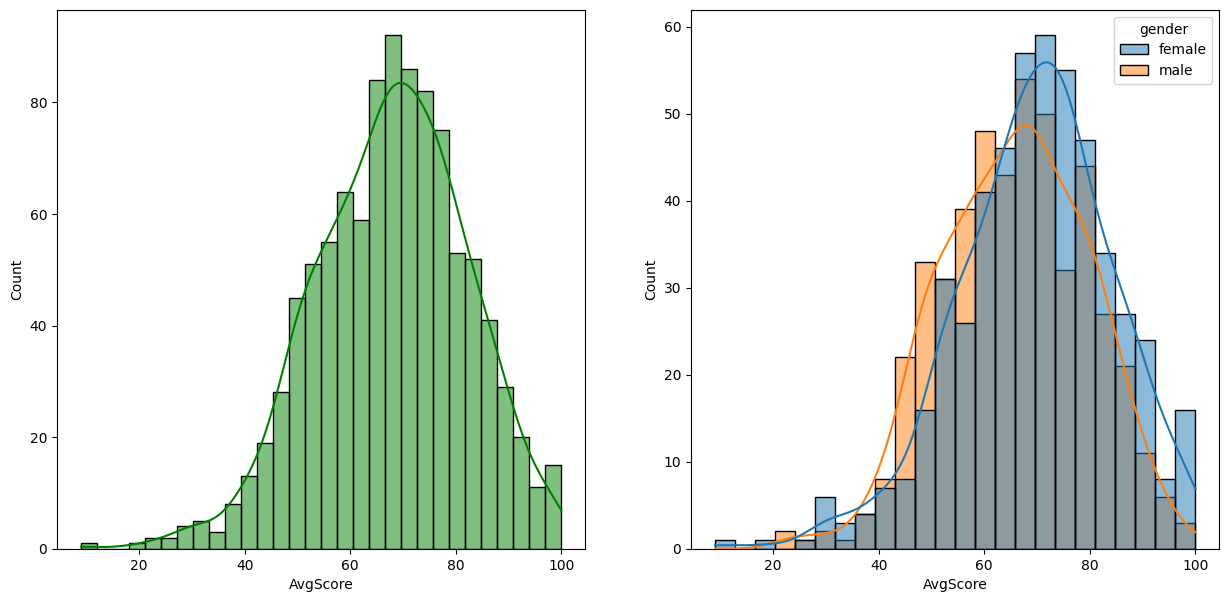

In [42]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='AvgScore',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='AvgScore',kde=True,hue='gender')

In [43]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,AvgScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### Creating a CSV file into the Notebook folder

In [45]:
df.to_csv("StudentsPerformance_updated.csv", index=False)
